
# Deep Learning Project - 2 
# Music Genre Identification.
-------------------------------------------
 ## Given audio files we have to classify whether the audio is of any of these 10 class:
 * Blues
 * Classical
 * Country
 * Disco
 * Hip Hop
 * Jazz
 * Metal
 * Pop
 * Raggae
 * Rock

 
 <img src='https://www.musicplus.in/wp-content/uploads/2020/09/Music_Genre_Feature.jpg'/>

In [1]:
! wget  https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz

--2021-07-15 07:36:42--  https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/4jw31k5mlzcmgis/genres.tar.gz [following]
--2021-07-15 07:36:42--  https://www.dropbox.com/s/raw/4jw31k5mlzcmgis/genres.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8a0df596d071ce8a469b9101d1.dl.dropboxusercontent.com/cd/0/inline/BSWUj9CFGO9s_0geUG4_i9zbU72foPOUg2P-xYVjy1iGcA8vcYnav58vyekDYHt_iGmbVwJDuqGJ_pZNvNWf-N24mZhNGB9EPNm_u4XK0f2I5HpHZKhwUh1pgHKSrbAc37BxFA4QFjtoKV9F68byEoN-/file# [following]
--2021-07-15 07:36:43--  https://uc8a0df596d071ce8a469b9101d1.dl.dropboxusercontent.com/cd/0/inline/BSWUj9CFGO9s_0geUG4_i9zbU72foPOUg2P-xYVjy1iGcA8vcYnav58vyekDYHt_iGmbVwJDuqGJ_pZNvNWf-N

In [2]:
! tar -xf genres.tar.gz

## Let us import the required modules

In [ ]:
! pip install path

In [ ]:
! pip install ann_visualizer

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp37-none-any.whl size=4168 sha256=8745bbdf6e16b897b6deefc32dbae4e469177a4bcda27f967a2eebab7d7a2c70
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


In [ ]:
! pip install graphviz

In [ ]:
! pip3 install opencv-contrib-python

# Import Packages

In [4]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib import figure
import os
import cv2


print("All the Modules have been Imported")

All the Modules have been Imported


# Let us see how the Spectrogram for one audio looks like

[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] 22050


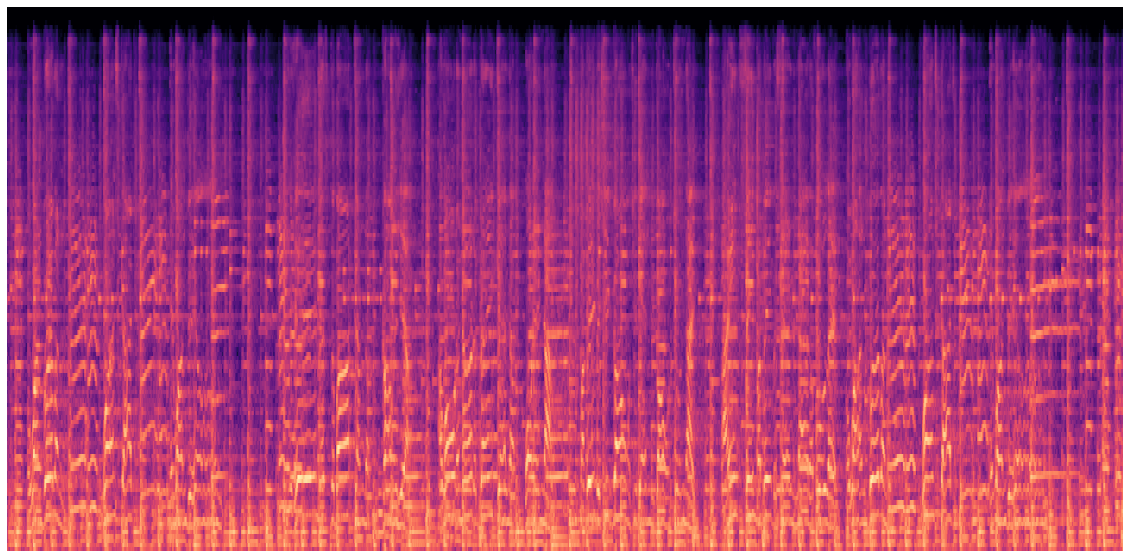

In [5]:
clip, sample_rate= librosa.load('/content/genres/blues/blues.00000.au',sr = None)
print(clip,sample_rate)

fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
plt.show()

## Create Train and Test Directories and also making directories within Train

In [6]:
# Change Directory to Genres
os.chdir('/content/genres/')
# Create a List of all class in the Genres
list_of_class = os.listdir()
# Create train and Test Folder
os.mkdir('train')
os.mkdir('test')
# Create directories in train directory
os.chdir('/content/genres/train')
for _ in list_of_class:
  os.mkdir(_)


## Classes that we have

In [7]:
print("These are the classes: ",list_of_class)

These are the classes:  ['classical', 'country', 'disco', 'pop', 'hiphop', 'jazz', 'metal', 'blues', 'rock', 'reggae']


## Create Spectogram and Create Train and Test Split

In [8]:
#######################################################
# Creation of Spectogram and splitting train and test
######################################################
def spectogram_creation(file_name):
  for class_ in list_of_class:
    PATH = file_name+class_ #file_name
    os.chdir(PATH)
    print("Started: "+class_)
    for i,files in enumerate(os.listdir()):
      plt.interactive(False)
      clip, sample_rate = librosa.load(files, sr=None)
      fig = plt.figure(figsize=[1,1])
      ax = fig.add_subplot(111)
      ax.axes.get_xaxis().set_visible(False)
      ax.axes.get_yaxis().set_visible(False)
      ax.set_frame_on(False)
      S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
      librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
      name = files.split('.au')[0]
      ##########################
      # Train and Test Split
      ###########################
      if(i%10 == 0): # For every 10th spectogram file we will store in Test Folder
        filename  = '/content/genres/test/'+ name + '.jpg'
      else:
        filename  = '/content/genres/train/'+class_+"/"+ name + '.jpg'
      plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
      plt.close()    
      fig.clf()
      plt.close(fig)
      plt.close('all')
      del filename,name,clip,sample_rate,fig,ax,S
    print("Done: "+class_)

file_name = "/content/genres/"
spectogram_creation(file_name)

Started: classical
Done: classical
Started: country
Done: country
Started: disco
Done: disco
Started: pop
Done: pop
Started: hiphop
Done: hiphop
Started: jazz
Done: jazz
Started: metal
Done: metal
Started: blues
Done: blues
Started: rock
Done: rock
Started: reggae
Done: reggae


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
WIDTH = 64
HEIGHT = 64
BATCH_SIZE = 32
TRAIN_DIR=r'/content/genres/train'

# Data Preparation
train_datagen = ImageDataGenerator(
    rescale=1./255.,validation_split=0.20)


train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 900 images belonging to 10 classes.


## Neural Network

In [ ]:
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras import regularizers, optimizers


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,3)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizers.RMSprop(learning_rate=0.001, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        3

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=80
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/80
28/28 [==============================] - 26s 883ms/step - loss: 2.3465 - accuracy: 0.0887
Epoch 2/80
28/28 [==============================] - 25s 881ms/step - loss: 2.3032 - accuracy: 0.1394
Epoch 3/80
28/28 [==============================] - 25s 877ms/step - loss: 2.1987 - accuracy: 0.1855
Epoch 4/80
28/28 [==============================] - 25s 876ms/step - loss: 2.1552 - accuracy: 0.2385
Epoch 5/80
28/28 [==============================] - 25s 876ms/step - loss: 1.9251 - accuracy: 0.2811
Epoch 6/80
28/28 [==============================] - 25s 879ms/step - loss: 1.8713 - accuracy: 0.3134
Epoch 7/80
28/28 [==============================] - 25s 909ms/step - loss: 1.8587 - accuracy: 0.3456
Epoch 8/80
28/28 [==============================] - 25s 874ms/step - loss: 1.7068 - accuracy: 0.3618
Epoch 9/80
28/28 [==============================] - 25s 878ms/step - loss: 1.6864 - accuracy: 0.3687
Epoch 10/80
28/28 [==============================] - 25s 887ms/step - loss: 1.7200 - accura

## Save and Load the Model

In [ ]:
## Saving Model
model.save('Audio_Model')

INFO:tensorflow:Assets written to: Audio_Model/assets


In [ ]:
#! zip -r Audio_model.zip /content/genres/test/Audio_Model/

  adding: content/genres/test/Audio_Model/ (stored 0%)
  adding: content/genres/test/Audio_Model/keras_metadata.pb (deflated 93%)
  adding: content/genres/test/Audio_Model/variables/ (stored 0%)
  adding: content/genres/test/Audio_Model/variables/variables.index (deflated 69%)
  adding: content/genres/test/Audio_Model/variables/variables.data-00000-of-00001 (deflated 16%)
  adding: content/genres/test/Audio_Model/assets/ (stored 0%)
  adding: content/genres/test/Audio_Model/saved_model.pb (deflated 90%)


In [10]:
! unzip /content/Audio_model.zip

Archive:  /content/Audio_model.zip
   creating: content/genres/test/Audio_Model/
  inflating: content/genres/test/Audio_Model/keras_metadata.pb  
   creating: content/genres/test/Audio_Model/variables/
  inflating: content/genres/test/Audio_Model/variables/variables.index  
  inflating: content/genres/test/Audio_Model/variables/variables.data-00000-of-00001  
   creating: content/genres/test/Audio_Model/assets/
  inflating: content/genres/test/Audio_Model/saved_model.pb  


In [14]:
## Loading the Model
from tensorflow import keras
model = keras.models.load_model('content/genres/test/Audio_Model')

In [36]:
WIDTH = 64
HEIGHT = 64
os.chdir("/content/genres/test/")
### Read Image, Reshape, Expand Dimensions and Predict
img_predict = cv2.imread("classical.00000.jpg")
new_img = cv2.resize(img_predict,(HEIGHT,WIDTH))
new_img = np.expand_dims(new_img,axis =0)
# Let's Predict
print("Predicted Image: ", list_of_class[np.argmax(model.predict(new_img))])

Predicted Image:  classical
